In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
cell_df = pd.read_csv('/Users/lesternielsalvador/Desktop/featureVectors.csv')
cell_df.tail()
cell_df.shape
cell_df.size
cell_df.count()
cell_df['target'].value_counts()

0    64
1    32
Name: target, dtype: int64

<AxesSubplot:xlabel='mean', ylabel='enropy'>

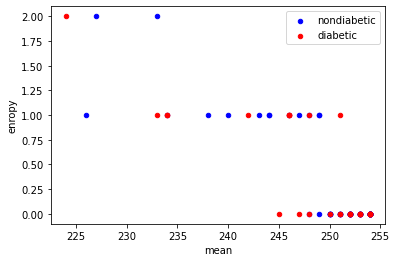

In [55]:
nondiabetic_df = cell_df[cell_df['target']==0][2:97]
diabetic_df = cell_df[cell_df['target']==1][2:97]

axes = nondiabetic_df.plot(kind='scatter', x='mean', y='enropy', color='blue', label='nondiabetic')

diabetic_df.plot(kind='scatter', x='mean', y='enropy', color='red', label='diabetic', ax=axes)
#help(nondiabetic_df.plot)

In [58]:
cell_df.dtypes

cell_df=cell_df[pd.to_numeric(cell_df['mean'], errors='coerce').notnull()]
cell_df['mean']=cell_df['mean'].astype('int')
cell_df=cell_df[pd.to_numeric(cell_df['variance'], errors='coerce').notnull()]
cell_df['variance']=cell_df['variance'].astype('int')
cell_df=cell_df[pd.to_numeric(cell_df['kurtosis'], errors='coerce').notnull()]
cell_df['kurtosis']=cell_df['kurtosis'].astype('int')
cell_df=cell_df[pd.to_numeric(cell_df['std'], errors='coerce').notnull()]
cell_df['std']=cell_df['std'].astype('int')
cell_df=cell_df[pd.to_numeric(cell_df['enropy'], errors='coerce').notnull()]
cell_df['enropy']=cell_df['enropy'].astype('int')
cell_df=cell_df[pd.to_numeric(cell_df['skewness'], errors='coerce').notnull()]
cell_df['skewness']=cell_df['skewness'].astype('int')
cell_df.dtypes

Unnamed: 0      object
mean             int64
variance         int64
kurtosis         int64
std              int64
enropy           int64
skewness         int64
target           int64
Target names    object
dtype: object

In [59]:
cell_df.columns

feature_df=cell_df[['mean', 'variance', 'kurtosis', 'std', 'enropy',
       'skewness']]

x = np.asarray(feature_df)
y = np.asarray(cell_df['target'])

y[0:5]

array([0, 0, 0, 0, 0])

In [60]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test =train_test_split(x,y, test_size = 0.2, random_state = 4)

#72 x 6
x_train.shape

#72 x 1
y_train.shape

#19 x 6
x_test.shape

#19 x 1
y_test.shape

(19,)

In [ ]:
from sklearn import svm

classifier = svm.SVC(kernel='linear', gamma='auto', C=1)
classifier.fit(x_train, y_train)

y_predict=classifier.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))